In [3]:
import cv2
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
import json
import math
import warnings
import math
warnings.filterwarnings('ignore')

In [4]:
import csv

In [11]:
# root_dir = '/data1/Heerlen_HR_2018/full/'

In [6]:
def get_dataset_name(file_name_with_dir):
    filename_without_dir = file_name_with_dir.split('/')[-1]
    return filename_without_dir

In [7]:
def get_labels(data_paths, df):
    labels = []
    dictionary = dict(zip(df['unique_id'], df['label']))
    for path in data_paths:     
        # labels
        img_file = get_dataset_name(path)
        lab = dictionary[img_file]
        labels.append(lab)
    return np.array(labels)

In [9]:
# all_labels = get_labels(data_paths, df)
# len(all_labels)

In [10]:
def concatenate_data(data_path, df):
    data = []
    labels = []
    dictionary = dict(zip(df['unique_id'], df['label']))
    for path in data_path:     
        # data
        img_matrix = cv2.imread(path)
        img_matrix =  cv2.cvtColor(img_matrix, cv2.COLOR_BGR2RGB)
        crop_img = img_matrix[:-13,:-13]
        data.append(crop_img)
        # labels
        img_file = get_dataset_name(path)
        lab = dictionary[img_file]
        labels.append(lab)
        
        if len(data) % 1000 == 0:
            print('{} of {} samples processed'.format(len(data), len(data_paths)))
    return np.array(data), np.array(labels)

In [10]:
# data, labels = concatenate_data(data_paths, df)

Now the data and labels are created for 10,000 samples and we can make a csv file (I think).

In [ ]:
# csv_files = []
# for img in os.listdir(root_dir):
#     if img.endswith('csv'):
#         csv_files.append(img)
# csv_name = csv_files[0]

In [ ]:
# df = pd.read_csv(root_dir + csv_name, delimiter=';')

In [ ]:
# df[:2]

In [ ]:
# def get_dataset_name(file_name_with_dir):
#     filename_without_dir = file_name_with_dir.split('/')[-1]
#     return filename_without_dir

# def id_label_link(data_path):
    
#     # select csv file
#     csv_files = []
#     for img in os.listdir(data_path):
#         if img.endswith('csv'):
#             csv_files.append(img)
#     csv_name = csv_files[0]
    
#     # create df and extract nr of pos and neg
#     df = pd.read_csv(data_path + csv_name, delimiter=';')
#     positives = np.array(df['positives'])
#     negatives = np.array(df['negatives'])
    
#     # return label per sample
#     label = np.zeros(len(positives))
#     for i in range(len(label)):
#         if int(positives[i]) > int(negatives[i]):
#             label[i] = int(1)
#         else:
#             label[i] = int(0)

#     # extract the img_id from the df
#     img_id = np.array(df['uuid'])
#     img_id_tiff = []
#     for unq_id in img_id:
#         unq_id_tiff = unq_id + '_rgb_hr_2018.tiff'
#         img_id_tiff.append(unq_id_tiff)
#     img_id_tiff = np.array(img_id_tiff)

#     # link the final label to the id
#     id_label_link = []
#     for i in range(len(label)):
#         id_label_link.append((img_id_tiff[i], label[i]))
#     dict_id_label = dict(id_label_link)

#     return dict_id_label

In [ ]:
# id_label_file = open('id_and_label_ZL.csv', 'w')
# dict_id_label = id_label_link(root_dir)

In [ ]:
# len(dict_id_label)

In [ ]:
# writer = csv.writer(id_label_file)
# for the_id, label in dict_id_label.items():
#     writer.writerow([the_id, label])
    
# id_label_file.close()

### Creat csv file for balanced dataset from original csv

`count` is the number of positives in this test set

In [13]:
df = pd.read_csv('/data1/Itzel/csv_files/HR_complete.csv')

In [15]:
df.head()

unique_id  label
0  95395367-3700-4459-835c-f3c300f65366_rgb_hr_20...    0.0
1  d97db244-373e-4db0-b36f-97868663b55c_rgb_hr_20...    1.0
2  f9c6cf99-ca1d-4100-aa6f-cfe8334f9150_rgb_hr_20...    1.0
3  4f03a31c-63ce-443e-b417-ce7f2bbc5a51_rgb_hr_20...    0.0
4  5423dadf-cdf5-49a1-96d6-0a2ad9397f0d_rgb_hr_20...    1.0

In [14]:
df['unique_id'][0]

'95395367-3700-4459-835c-f3c300f65366_rgb_hr_2018.tiff'

In [20]:
all_positives = 0
for i in df['label']:
    if i == 1:
        all_positives += 1
all_positives

4672

In [29]:
nr_pos_train = round(0.7 * all_positives)
nr_pos_val = round(0.2 *all_positives)
nr_pos_test = round(0.1 * all_positives) + 1

print(nr_pos_train)
print(nr_pos_val)
print(nr_pos_test)
print(nr_pos_train + nr_pos_val + nr_pos_test == all_positives)

3270
934
468
True


In [30]:
all_negatives = len(df) - all_positives
all_negatives

19175

In [31]:
nr_neg_train = round(0.7 * all_negatives)
nr_neg_val = round(0.2 *all_negatives)
nr_neg_test = round(0.1 * all_negatives)

print(nr_neg_train)
print(nr_neg_val)
print(nr_neg_test)
print(nr_neg_train + nr_neg_val + nr_neg_test == all_negatives)

13422
3835
1918
True


In [34]:
print(nr_neg_train + nr_pos_train)
print(nr_neg_val + nr_pos_val)
print(nr_neg_test + nr_pos_test)

print(nr_neg_train + nr_neg_val + nr_neg_test  + nr_pos_train + nr_pos_val + nr_pos_test == len(df))

16692
4769
2386
True


`names` are all the unique ids which we want to add to the csv file

In [119]:
names = df['unique_id']
labels = df['label']

In [120]:
print(len(names))
print(len(labels))

23847
23847


In [121]:
print(nr_neg_train + nr_pos_train)
print(nr_neg_val + nr_pos_val)
print(nr_neg_test + nr_pos_test)

16692
4769
2386


In [122]:
print(nr_pos_train)
print(nr_pos_val)
print(nr_pos_test)

3270
934
468


In [123]:
pos_indices = []
for index, label in enumerate(labels):
    if label == np.float(1.0):
        pos_indices.append(index)

In [124]:
len(pos_indices)

4672

In [125]:
pos_indices_train = pos_indices[:nr_pos_train]
pos_indices_val = pos_indices[nr_pos_train:nr_pos_train+nr_pos_val]
pos_indices_test = pos_indices[-nr_pos_test:]

In [126]:
print(len(pos_indices_train))
print(len(pos_indices_val))
print(len(pos_indices_test))

3270
934
468


In [127]:
def get_pos_ids(pos_indices_type):
    pos_ids = []
    for index in pos_indices_type:
        img_name = names[index]
        pos_ids.append(img_name)
    return pos_ids

In [128]:
pos_ids_train = get_pos_ids(pos_indices_train)
pos_ids_val = get_pos_ids(pos_indices_val)
pos_ids_test = get_pos_ids(pos_indices_test)

### negatives

In [129]:
neg_indices = []
for index, label in enumerate(labels):
    if label == np.float(0.0):
        neg_indices.append(index)

In [130]:
len(neg_indices)

19175

In [131]:
neg_indices_train = neg_indices[:nr_neg_train]
neg_indices_val = neg_indices[nr_neg_train:nr_neg_train+nr_neg_val]
neg_indices_test = neg_indices[-nr_neg_test:]

In [132]:
print(len(neg_indices_train))
print(len(neg_indices_val))
print(len(neg_indices_test))

13422
3835
1918


In [136]:
def get_neg_ids(neg_indices_type):
    neg_ids = []
    for index in neg_indices_type:
        img_name = names[index]
        neg_ids.append(img_name)
    return neg_ids

In [137]:
neg_ids_train = get_neg_ids(neg_indices_train)
neg_ids_val = get_neg_ids(neg_indices_val)
neg_ids_test = get_neg_ids(neg_indices_test)

### create labels

In [193]:
def create_labs(class_ids_type, the_class):
    class_labs_type = []
    for i in range(len(class_ids_type)):
        class_labs_type.append(np.float(the_class))
    return class_labs_type

In [196]:
pos_labs_train = create_labs(pos_ids_train, 1)
pos_labs_val = create_labs(pos_ids_val, 1)
pos_labs_test = create_labs(pos_ids_test, 1)

neg_labs_train = create_labs(neg_ids_train, 0)
neg_labs_val = create_labs(neg_ids_val, 0)
neg_labs_test = create_labs(neg_ids_test, 0)

In [197]:
print(len(pos_labs_train))
print(len(pos_labs_val))
print(len(pos_labs_test))
print('')
print(len(neg_labs_train))
print(len(neg_labs_val))
print(len(neg_labs_test))

3270
934
468

13422
3835
1918


In [198]:
def id_label_link(class_labs_type, class_ids_type):
    id_label_link = []
    for i in range(len(class_labs_type)):
        id_label_link.append((class_ids_type[i], class_labs_type[i]))
    return id_label_link

In [199]:
pos_link_train = id_label_link(pos_labs_train, pos_ids_train)
pos_link_val = id_label_link(pos_labs_val, pos_ids_val)
pos_link_test = id_label_link(pos_labs_test, pos_ids_test)

neg_link_train = id_label_link(neg_labs_train, neg_ids_train)
neg_link_val = id_label_link(neg_labs_val, neg_ids_val)
neg_link_test = id_label_link(neg_labs_test, neg_ids_test)

In [200]:
import random

In [201]:
link_train = pos_link_train + neg_link_train
link_val = pos_link_val + neg_link_val
link_test = pos_link_test + neg_link_test

shuffle_train = random.sample(link_train, len(link_train))
shuffle_val = random.sample(link_val, len(link_val))
shuffle_test = random.sample(link_test, len(link_test))

dict_train = dict(shuffle_train)
dict_val = dict(shuffle_val)
dict_test = dict(shuffle_test)

In [202]:
import csv

In [208]:
dict_id_label_link = dict_test

In [209]:
id_label_file = open('HR_test.csv', 'w')
writer = csv.writer(id_label_file)
writer.writerow(['unique_id', 'label'])
for the_id, label in dict_id_label_link.items():
    writer.writerow([the_id, label])
    
id_label_file.close()

### test if done correctly

In [184]:
print('Train:')
print(nr_pos_train)
print(nr_neg_train)
print(nr_neg_train + nr_pos_train)
print('')
print('Val:')
print(nr_pos_val)
print(nr_neg_val)
print(nr_neg_val + nr_pos_val)
print('')
print('TestL')
print(nr_pos_test)
print(nr_neg_test)
print(nr_neg_test + nr_pos_test)
print('')
print('All:')
print(nr_neg_train + nr_neg_val + nr_neg_test  + nr_pos_train + nr_pos_val + nr_pos_test == len(df))

Train:
3270
13422
16692

Val:
934
3835
4769

TestL
468
1918
2386

All:
True


In [210]:
train_df = pd.read_csv('HR_train.csv')
val_df = pd.read_csv('HR_val.csv')
test_df = pd.read_csv('HR_test.csv')

In [211]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

16692
4769
2386


In [217]:
pos_train = 0
for label in test_df.iloc[:,1]:
    if int(label) == 1:
        pos_train += 1

In [218]:
pos_train

468

In [46]:
import cv2
import matplotlib.pyplot as plt

In [47]:
import torch

tensor(1)


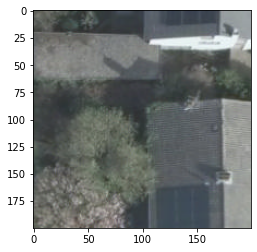

In [51]:
index = 9998
random_img = cv2.imread(root_dir + test_df.iloc[index,0])
random_img =  cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB)
y_label = torch.tensor(int(test_df.iloc[index, 1]))
plt.imshow(random_img)
print(y_label)